In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTANDO LOS DATOS

In [2]:
data = pd.read_excel("incidentes seguridad 2022.xlsx")
#No lo importa, se copio la informacion con formato plano en otro doc excel

In [3]:
#Cuantos procesos estan abiertos. Si esta fallando algo
#FRelacionar Tipificacion-Vertical
data.head(2)

Alta     96
Media    23
Baja      8
Name: Campo personalizado (IncidentDatabase-Severidad), dtype: int64

In [4]:
#RENOMBRANDO ALGUNAS COLUMNAS
# Anotar en el proceso
data = data.rename(columns= {"Campo personalizado (IncidentDatabase-Severidad)": "Incidente-Severidad",
                      "Campo personalizado (IncidentDatabase-Tipificacion)": "Incidente-Tipificacion",
                      "Campo personalizado (SecOps-Field-Vertical)": "Vertical",
                      "Campo personalizado (incidentDatabase-causaRaiz)": "CausaRaiz"})
data.columns

Index(['Estado', 'Responsable', 'Creada', 'Resuelta', 'Incidente-Severidad',
       'Incidente-Tipificacion', 'Vertical', 'POSITION_ID', 'CausaRaiz'],
      dtype='object')

### Frecuencias para cada una de las columnas

In [5]:
#data["Responsable"].value_counts()
data["Incidente-Severidad"].value_counts()
#data["IncidentDatabase-Tipificacion"].value_counts()
#data["SecOps-Field-Vertical"].unique()
#data["incidentDatabase-causaRaiz"].value_counts() #TIENE MUCHAS CARACTERISTICAS NO ESTA ESTANDARIZADO

Alta     96
Media    23
Baja      8
Name: Incidente-Severidad, dtype: int64

--------------------

# Graficando Datos

## Responsables Incidentes

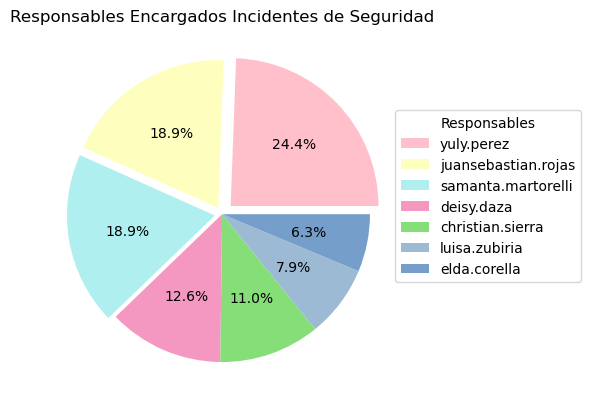

In [6]:
x_data = data["Responsable"].value_counts()
etiquetas =["yuly.perez", "juansebastian.rojas", "samanta.martorelli", "deisy.daza", "christian.sierra", "luisa.zubiria", "elda.corella"]

plt.pie(x_data, explode=(0.08,0.05,0.05,0,0,0,0),
       autopct="%1.1f%%", colors= ["#FFC0CB","#FEFFBF", "#B0EFEF","#F498C2","#85DE77","#9DBAD5","#769ECB"])
plt.legend(etiquetas, title="Responsables", bbox_to_anchor=(.95, .8))
plt.title("Responsables Encargados Incidentes de Seguridad")
plt.show()

-----------------

## INCIDENTES SEGUN EL TIPO DE RIESGO

In [7]:
x_data = data["Incidente-Severidad"]
y_data = data["Incidente-Tipificacion"]

data_violin = pd.concat([x_data, y_data], axis=1)

#CAMBIANDO VALORES CATEGORICOS POR NUMERICOS
data_violin["Incidente-Tipificacion"] = np.where(data_violin["Incidente-Tipificacion"]== "Incumplimiento de Políticas",9,
                            np.where(data_violin["Incidente-Tipificacion"]=="Exposición de Datos",8,
                            np.where(data_violin["Incidente-Tipificacion"]=="Ataques Externos",7,
                            np.where(data_violin["Incidente-Tipificacion"]=="Exposición de Datos Personales",6,                                     
                            np.where(data_violin["Incidente-Tipificacion"]=="Anomalía o vulnerabilidad técnica de software.",5,
                            np.where(data_violin["Incidente-Tipificacion"]=="Fraude externo",4,
                            np.where(data_violin["Incidente-Tipificacion"]=="Interrupción prolongada en un sistema o servicio de red.",3,
                            np.where(data_violin["Incidente-Tipificacion"]=="Robo pérdida de información Sensible",2,
                            np.where(data_violin["Incidente-Tipificacion"]=="Acceso no autorizado",1,0)))))))))

#data_violin.head(10)
#y_data.value_counts()

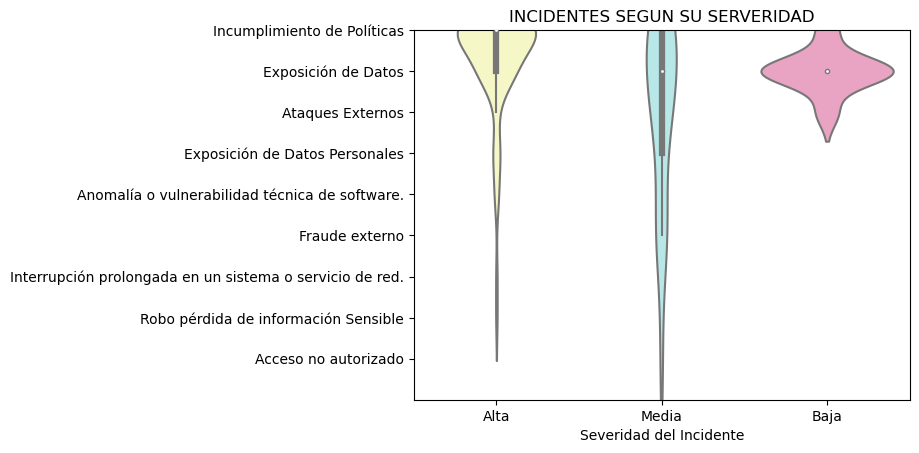

In [8]:
sns.violinplot(data=data_violin, x="Incidente-Severidad", y="Incidente-Tipificacion",
              order = data["Incidente-Severidad"].value_counts().index,
              palette=["#FEFFBF", "#B0EFEF","#F498C2"])
plt.ylim(0,9)
plt.yticks([9,8,7,6,5,4,3,2,1], ["Incumplimiento de Políticas",
                                   "Exposición de Datos",
                                   "Ataques Externos",
                                   "Exposición de Datos Personales",
                                   "Anomalía o vulnerabilidad técnica de software.",
                                   "Fraude externo",
                                   "Interrupción prolongada en un sistema o servicio de red.",
                                   "Robo pérdida de información Sensible",
                                   "Acceso no autorizado"])
plt.title("INCIDENTES SEGUN SU SERVERIDAD")
plt.xlabel("Severidad del Incidente")
plt.ylabel(None)
plt.show()

------------

## Areas con Mayores Incidentes de Seguridad segun Criticidad del incidente

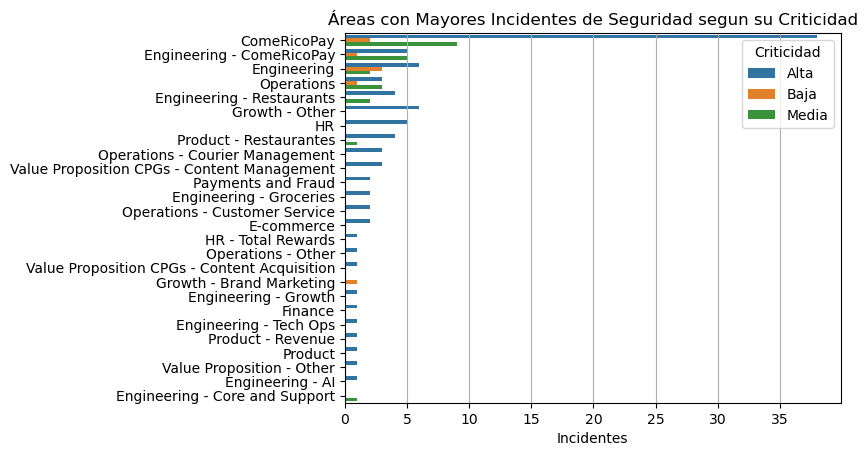

In [9]:
sns.countplot(y="Vertical", data=data, 
              order = data["Vertical"].value_counts().index, hue="Incidente-Severidad")
plt.title("Áreas con Mayores Incidentes de Seguridad segun su Criticidad")
plt.xlabel("Incidentes")
plt.ylabel(None)
plt.legend(title="Criticidad")
plt.grid(axis="x")
plt.show()

------

## Areas con Procesos Abiertos

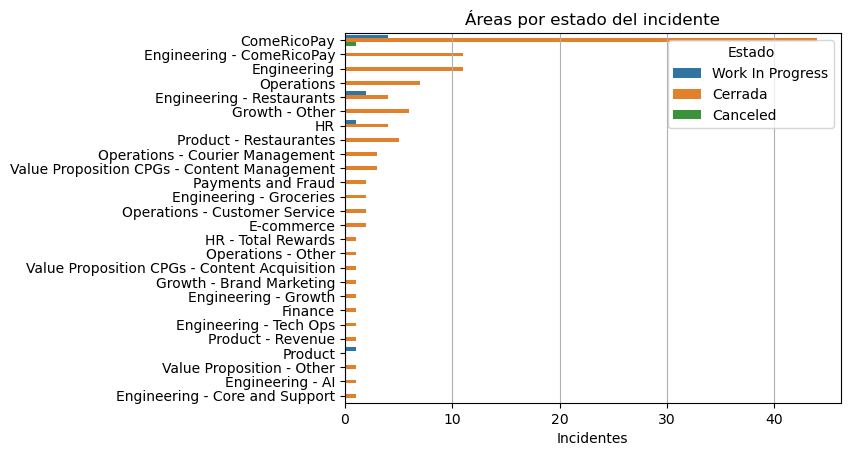

In [10]:
sns.countplot(y="Vertical", data=data, 
              order = data["Vertical"].value_counts().index, hue="Estado")
plt.title("Áreas por estado del incidente")
plt.xlabel("Incidentes")
plt.ylabel(None)
plt.grid(axis="x")
plt.show()